In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import torch
import torch.nn as nn
import cebra_v2 as cebra2
from collections import defaultdict
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,FastICA
from torch.utils.data.sampler import BatchSampler
import package
import pandas as pd
import matplotlib.animation as animation
import matplotlib.cm as cm
import tembedding
import scipy as sc
from skimage.metrics import structural_similarity as ssim
from sklearn.cluster import KMeans,OPTICS,DBSCAN
import math
from joblib import Memory,Parallel,delayed,parallel_backend
import time
from multiprocessing import Lock, Process, Queue
import multiprocessing
import queue 
import os
import networkx as nx
from scipy.spatial.transform import Rotation as R
import sklearn

In [2]:
dfc = np.load('/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/inputs.npy')
meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/metadata.tsv", sep="\t")

In [37]:
n_runs = len(set(meta["unique_id"] + meta["monkey"]))
n_wins = 464
dfc_all = dfc.reshape((-1, 82, 82))
dfc_all_vector = package.preprocessing.flatten_higher_triangular(torch.from_numpy(dfc_all))

In [30]:
dfc_awake = dfc[meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana', 'jade']) & (meta["condition"].isin(['awake']))].reshape((-1, n_wins, 82, 82))
dfc_awake_vector = torch.from_numpy(package.preprocessing.flatten_higher_triangular(torch.from_numpy(dfc_awake)))
dfc_light_propofol = dfc[meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana', 'jade']) & (meta["condition"].isin(['light-propofol']))].reshape((-1, n_wins, 82, 82))
dfc_light_propofol_vector = torch.from_numpy(package.preprocessing.flatten_higher_triangular(torch.from_numpy(dfc_light_propofol)))
dfc_deep_propofol = dfc[meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana']) & (meta["condition"].isin(['deep-propofol']))].reshape((-1, n_wins, 82, 82))
dfc_deep_propofol_vector = torch.from_numpy(package.preprocessing.flatten_higher_triangular(torch.from_numpy(dfc_deep_propofol)))

In [55]:
mean = torch.mean(dfc_all_vector,axis = -1)

In [61]:
dfc_norm_awake = np.linalg.norm(dfc_awake_vector[:,:,:10] - mean[:10],axis = -1)
dfc_norm_light_propofol = np.linalg.norm(dfc_light_propofol_vector[:,:,:10] - mean[:10],axis = -1)
dfc_norm_deep_propofol = np.linalg.norm(dfc_deep_propofol_vector[:,:,:10] - mean[:10],axis = -1)

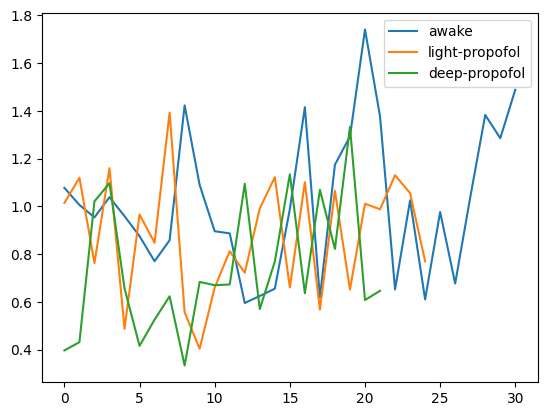

In [62]:
plt.plot(dfc_norm_awake[:,0], label = "awake")
plt.plot(dfc_norm_light_propofol[:,0], label = "light-propofol")
plt.plot(dfc_norm_deep_propofol[:,0], label = "deep-propofol")
plt.legend()

NameError: name 'labels_train' is not defined

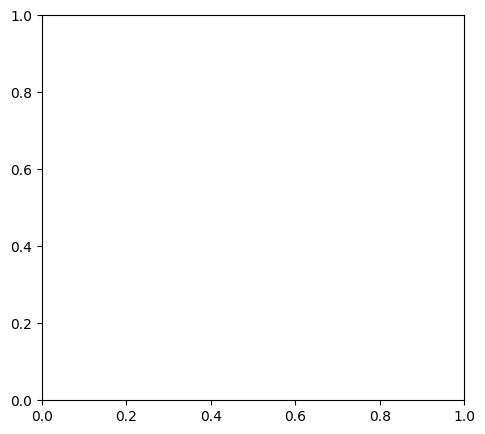

In [54]:
fig = plt.figure(figsize = (12,5))

ax1 = plt.subplot(121)
colors = ["black",'red','green','blue','pink','grey']
for i in range(58):
    ax1.scatter(dfc[i,:,0], dfc[i,:,4], c = colors[int(labels_train[i,0])], s=1)
#ax1.xticks() 
ax1.axis('on')

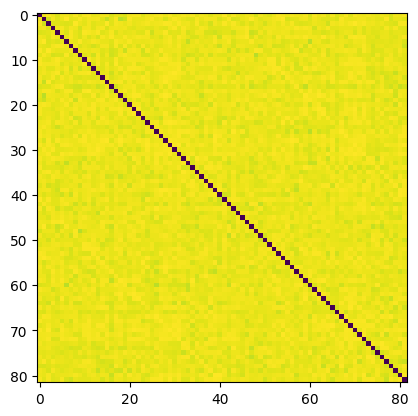

In [10]:
dfc_max_light_propofol = np.max(np.abs(dfc_light_propofol).reshape(-1,82,82),axis = 0)
plt.imshow(dfc_max_light_propofol)

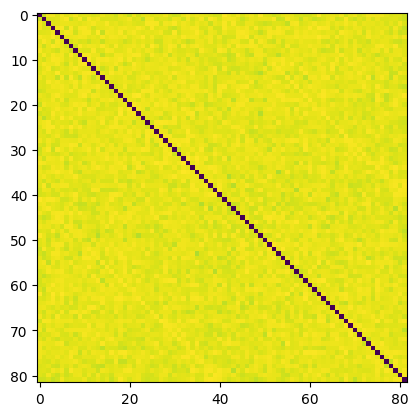

In [11]:
dfc_max_deep_propofol = np.max(np.abs(dfc_deep_propofol).reshape(-1,82,82),axis = 0)
plt.imshow(dfc_max_deep_propofol)

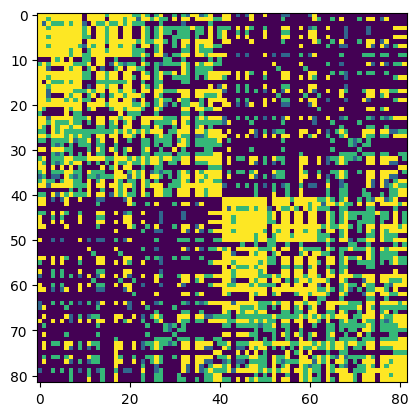

In [33]:
structural_matrix = np.loadtxt('/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/structural.txt')
plt.imshow(structural_matrix)

In [35]:
structural_matrix[0]

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 0., 3., 3., 3., 3., 2., 3.,
       3., 3., 3., 3., 2., 2., 3., 2., 0., 2., 3., 0., 0., 2., 0., 2., 1.,
       3., 3., 1., 2., 3., 0., 0., 3., 3., 0., 1., 0., 1., 3., 0., 0., 3.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 3., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])